In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Activation, LSTM
from keras.utils import np_utils

import os

# brew install graphviz
# pip3 install graphviz
# pip3 install pydot-ng
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:

# sample text
sample = "hihello"

char_set = list(set(sample))  # id -> char ['i', 'l', 'e', 'o', 'h']
char_dic = {w: i for i, w in enumerate(char_set)}

x_str = sample[:-1]
y_str = sample[1:]

data_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)

print(data_dim)
print(timesteps)
print(num_classes)
print(x_str, y_str)

5
6
5
hihell ihello


In [3]:

x = [char_dic[c] for c in x_str]  # char to index
y = [char_dic[c] for c in y_str]  # char to index
print(x)
print(y)

# One-hot encoding
x = np_utils.to_categorical(x, num_classes=num_classes)
# reshape X to be [samples, time steps, features]
x = np.reshape(x, (-1, len(x), data_dim))
print(x.shape)

[2, 4, 2, 3, 0, 0]
[4, 2, 3, 0, 0, 1]
(1, 6, 5)


In [4]:

# One-hot encoding
y = np_utils.to_categorical(y, num_classes=num_classes)
# time steps
y = np.reshape(y, (-1, len(y), data_dim))
print(y.shape)

(1, 6, 5)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 640)            1653760   
_________________________________________________________________
lstm_2 (LSTM)                (None, 6, 320)            1230080   
_________________________________________________________________
lstm_3 (LSTM)                (None, 6, 80)             128320    
_________________________________________________________________
lstm_4 (LSTM)                (None, 6, 20)             8080      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 6, 5)              105       
_________________________________________________________________
activation_1 (Activation)    (None, 6, 5)              0         
Total params: 3,020,345
Trainable params: 3,020,345
Non-trainable params: 0
_________________________________________

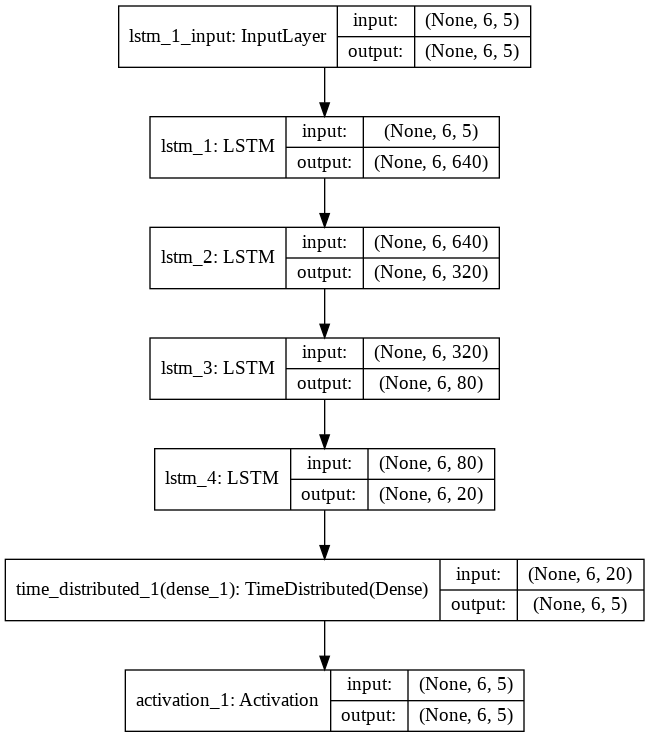

In [5]:

model = Sequential()

#model.add(LSTM(num_classes, input_shape=(timesteps, data_dim), return_sequences=True))

#wise and deep하게 layer를 구성하면 200 epochs안에 1.0의 acc 나옴
model.add(LSTM(num_classes*128, input_shape=(timesteps, data_dim), return_sequences=True))
model.add(LSTM(num_classes*64, return_sequences=True))
model.add(LSTM(num_classes*16, return_sequences=True))
model.add(LSTM(num_classes*4, return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax')) 
model.summary()

# Store model graph in png
# (Error occurs on in python interactive shell)
__file__ = 'hello-rnn-keras-img'
plot_model(model, to_file=os.path.basename(__file__) + '.png', show_shapes=True)

In [7]:

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(x, y, epochs=200)

predictions = model.predict(x, verbose=0)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.3580 - acc: 0.8333
Epoch 2/200
1/1 [==============================] - 0s 62ms/step - loss: 2.4731 - acc: 0.1667
Epoch 3/200
1/1 [==============================] - 0s 67ms/step - loss: 0.7208 - acc: 0.6667
Epoch 4/200
1/1 [==============================] - 0s 63ms/step - loss: 0.3654 - acc: 0.8333
Epoch 5/200
1/1 [==============================] - 0s 62ms/step - loss: 0.3443 - acc: 0.8333
Epoch 6/200
1/1 [==============================] - 0s 67ms/step - loss: 0.3338 - acc: 0.8333
Epoch 7/200
1/1 [==============================] - 0s 67ms/step - loss: 0.3269 - acc: 0.8333
Epoch 8/200
1/1 [==============================] - 0s 61ms/step - loss: 0.3217 - acc: 0.8333
Epoch 9/200
1/1 [==============================] - 0s 62ms/step - loss: 0.3172 - acc: 0.8333
Epoch 10/200
1/1 [==============================] - 0s 70ms/step - loss: 0.3136 - acc: 0.8333
Epoch 11/200
1/1 [==============================] - 0s 59ms/step - loss

In [8]:
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))

    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print(index, ''.join(result))


[[1.5283587e-03 7.2213932e-04 4.3674400e-03 9.7089523e-04 9.9241114e-01]
 [3.2136287e-04 1.3483933e-03 9.8965925e-01 3.4471976e-03 5.2238335e-03]
 [5.1641916e-03 1.7160063e-03 2.2231131e-03 9.8985684e-01 1.0398600e-03]
 [9.9373698e-01 1.4346383e-03 2.8011078e-04 3.5424065e-03 1.0058678e-03]
 [9.9145705e-01 7.0823370e-03 2.2176270e-04 8.8193989e-04 3.5690493e-04]
 [1.1230194e-02 9.8377085e-01 2.5205757e-03 2.2553327e-03 2.2305171e-04]]
[2 4 2 3 0 0] hihell
[4 2 3 0 0 1] ihello


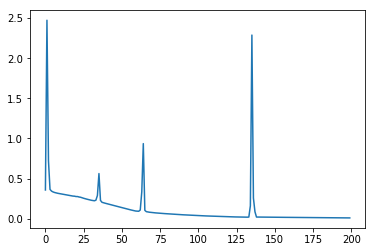

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()